### Directions 1

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
df=pd.read_pickle(r"C:\Users\sojan\Documents\Instacast_Basket_Analysis\02. Data\02. Prepared Data\combined_customer.pkl")

In [6]:
df.head

<bound method NDFrame.head of         user_id First_Name Last_Name  Gender       State  Age date_joined  \
0         26711    Deborah  Esquivel  Female    Missouri   48    1/1/2017   
1         26711    Deborah  Esquivel  Female    Missouri   48    1/1/2017   
2         26711    Deborah  Esquivel  Female    Missouri   48    1/1/2017   
3         33890   Patricia      Hart  Female  New Mexico   36    1/1/2017   
4         33890   Patricia      Hart  Female  New Mexico   36    1/1/2017   
...         ...        ...       ...     ...         ...  ...         ...   
999995    49635     Jeremy   Robbins    Male      Hawaii   62    4/1/2020   
999996   135902      Doris  Richmond  Female    Missouri   66    4/1/2020   
999997   135902      Doris  Richmond  Female    Missouri   66    4/1/2020   
999998   135902      Doris  Richmond  Female    Missouri   66    4/1/2020   
999999   135902      Doris  Richmond  Female    Missouri   66    4/1/2020   

        n_dependants family_status  income  .

### Directions 2

##### PII included in the above data columns are First_Name, Last_Name. In the case of the State, and Region data columns are also considerable for PII. However,  the columns are also essential for the analysis. 

### Directions 3

In [11]:
# Define a mapping of states to regions
state_to_region = {
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast', 'New Jersey': 'Northeast', 'New York': 'Northeast',
    'Pennsylvania': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
    
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest',
    'Michigan': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest',
    'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'Ohio': 'Midwest',
    'South Dakota': 'Midwest', 'Wisconsin': 'Midwest',

    'Alabama': 'South', 'Arkansas': 'South', 'Delaware': 'South', 'Florida': 'South',
    'Georgia': 'South', 'Kentucky': 'South', 'Louisiana': 'South', 'Maryland': 'South',
    'Mississippi': 'South', 'North Carolina': 'South', 'Oklahoma': 'South',
    'South Carolina': 'South', 'Tennessee': 'South', 'Texas': 'South', 
    'Virginia': 'South', 'Washington D.C.': 'South', 'West Virginia': 'South',
    
    'Alaska': 'West', 'Arizona': 'West', 'California': 'West', 'Colorado': 'West',
    'Hawaii': 'West', 'Idaho': 'West', 'Montana': 'West', 'Nevada': 'West',
    'New Mexico': 'West', 'Oregon': 'West', 'Utah': 'West', 'Washington': 'West',
    'Wyoming': 'West'
}

In [13]:
# Add the "Region" column to the DataFrame
df['Region'] = df['State'].map(state_to_region)

In [15]:
# Display the first few rows to check the "Region" column
df.head()

,user_id,First_Name,Last_Name,Gender,State,Age,date_joined,n_dependants,family_status,income,...,_merge,price_range,price_range_loc,busiest_period_of_day,max_order,loyalty_flag,spending_flag_x,spending_flag_y,order_frequency_flag,Region
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-range product,Mid-range product,Most orders,8,New customer,Low spender,Low spender,Regular customer,Midwest
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-range product,Mid-range product,Average orders,8,New customer,Low spender,Low spender,Regular customer,Midwest
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-range product,Mid-range product,Most orders,8,New customer,Low spender,Low spender,Regular customer,Midwest
3,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,both,Mid-range product,Mid-range product,Average orders,5,New customer,Low spender,Low spender,Non-frequent customer,West
4,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,both,Mid-range product,Mid-range product,Average orders,5,New customer,Low spender,Low spender,Non-frequent customer,West


In [40]:
# Analyze the spending behavior by region
spending_by_region = df.groupby('Region')['spending_flag_x'].value_counts(normalize=True).unstack()

# Display the result
print(spending_by_region)

spending_flag_x  High spender  Low spender
Region                                    
Midwest              0.195672     0.804328
Northeast            0.194693     0.805307
South                0.190489     0.809511
West                 0.195298     0.804702


##### According to the avobe table, the most high spending region is Midwest which sepnding amount is 0.195672 and lowest spending region is West which is 0.804702 in the USA. Other two regions like northest and south have average amount of spender.

### Directions 4

In [17]:
# Create an exclusion flag for low-activity customers (less than 5 orders)
df['exclusion_flag'] = df['max_order'].apply(lambda x: 1 if x < 5 else 0)

# Preview the data to check the new exclusion flag
df[['user_id', 'max_order', 'exclusion_flag']].head()

,user_id,max_order,exclusion_flag
0,26711,8,0
1,26711,8,0
2,26711,8,0
3,33890,5,0
4,33890,5,0


In [25]:
df_filtered1 = df[df['exclusion_flag'] != 0]

df_filtered1.shape

(78772, 35)

In [29]:
# Exclude low-activity customers
df_filtered = df[df['exclusion_flag'] == 0]

# Check the resulting data after exclusion
df_filtered.head()

,user_id,First_Name,Last_Name,Gender,State,Age,date_joined,n_dependants,family_status,income,...,price_range,price_range_loc,busiest_period_of_day,max_order,loyalty_flag,spending_flag_x,spending_flag_y,order_frequency_flag,Region,exclusion_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Mid-range product,Most orders,8,New customer,Low spender,Low spender,Regular customer,Midwest,0
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Mid-range product,Average orders,8,New customer,Low spender,Low spender,Regular customer,Midwest,0
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Mid-range product,Most orders,8,New customer,Low spender,Low spender,Regular customer,Midwest,0
3,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Mid-range product,Mid-range product,Average orders,5,New customer,Low spender,Low spender,Non-frequent customer,West,0
4,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Mid-range product,Mid-range product,Average orders,5,New customer,Low spender,Low spender,Non-frequent customer,West,0


In [31]:
df_filtered

,user_id,First_Name,Last_Name,Gender,State,Age,date_joined,n_dependants,family_status,income,...,price_range,price_range_loc,busiest_period_of_day,max_order,loyalty_flag,spending_flag_x,spending_flag_y,order_frequency_flag,Region,exclusion_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Mid-range product,Most orders,8,New customer,Low spender,Low spender,Regular customer,Midwest,0
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Mid-range product,Average orders,8,New customer,Low spender,Low spender,Regular customer,Midwest,0
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Mid-range product,Most orders,8,New customer,Low spender,Low spender,Regular customer,Midwest,0
3,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Mid-range product,Mid-range product,Average orders,5,New customer,Low spender,Low spender,Non-frequent customer,West,0
4,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Mid-range product,Mid-range product,Average orders,5,New customer,Low spender,Low spender,Non-frequent customer,West,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999993,122741,Carl,Weber,Male,Michigan,24,4/1/2020,2,married,73357,...,Mid-range product,Mid-range product,Average orders,10,New customer,Low spender,Low spender,Non-frequent customer,Midwest,0
999996,135902,Doris,Richmond,Female,Missouri,66,4/1/2020,2,married,53374,...,Mid-range product,Mid-range product,Average orders,8,New customer,Low spender,Low spender,Frequent customer,Midwest,0
999997,135902,Doris,Richmond,Female,Missouri,66,4/1/2020,2,married,53374,...,Mid-range product,Mid-range product,Average orders,8,New customer,Low spender,Low spender,Frequent customer,Midwest,0
999998,135902,Doris,Richmond,Female,Missouri,66,4/1/2020,2,married,53374,...,Mid-range product,Mid-range product,Most orders,8,New customer,Low spender,Low spender,Frequent customer,Midwest,0


In [33]:
df_filtered.to_csv(r'C:\Users\sojan\Documents\Instacast_Basket_Analysis\02. Data\02. Prepared Data\orders_products_customers.csv')

### Directions 5

In [24]:
# Define a function to profile customers
def customer_profile(row):
    # Unpacking values from each row
    age = row['Age']
    income = row['income']
    dependents = row['n_dependants']
    department = row['department_id']
    order_hour = row['order_hour_of_day']
    order_day = row['order_dow']


 # Profile based on age, dependents, and department preferences
    if age <= 35 and dependents == 0:
        return 'Single Adult'
    elif age <= 40 and dependents > 0 and department in [18, 19]:  # assuming 18 = baby products, 19 = diapers
        return 'Young Parent'
    elif age >= 35 and dependents > 1 and income >= 100000:
        return 'Affluent Family'
    elif age >= 60:
        return 'Senior Shopper'
    else:
        return 'Other'

In [26]:
# Apply the function to the DataFrame
df['customer_profile'] = df.apply(customer_profile, axis=1)

# Preview the first few rows of the updated DataFrame
df[['Age', 'income', 'n_dependants', 'department_id', 'customer_profile']].head()

,Age,income,n_dependants,department_id,customer_profile
0,48,165665,3,7,Affluent Family
1,48,165665,3,7,Affluent Family
2,48,165665,3,7,Affluent Family
3,36,59285,0,7,Other
4,36,59285,0,7,Other


In [60]:
df[['Age', 'income', 'n_dependants', 'department_id', 'customer_profile']]

,Age,income,n_dependants,department_id,customer_profile
0,48,165665,3,7,Affluent Family
1,48,165665,3,7,Affluent Family
2,48,165665,3,7,Affluent Family
3,36,59285,0,7,Other
4,36,59285,0,7,Other
...,...,...,...,...,...
999995,62,168639,3,17,Affluent Family
999996,66,53374,2,16,Senior Shopper
999997,66,53374,2,19,Senior Shopper
999998,66,53374,2,19,Senior Shopper


In [62]:
df.to_csv(r'C:\Users\sojan\Documents\Instacast_Basket_Analysis\02. Data\02. Prepared Data\instacart_customer_profiles.csv')

### Directions 6

In [65]:
# Set the style of the visualization
sns.set(style="whitegrid")

In [67]:
# Count the number of customers in each profile
profile_counts = df['customer_profile'].value_counts()

C:\Users\sojan\AppData\Local\Temp\ipykernel_17804\2161034507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profile_counts.index, y=profile_counts.values, palette="Greens_d")


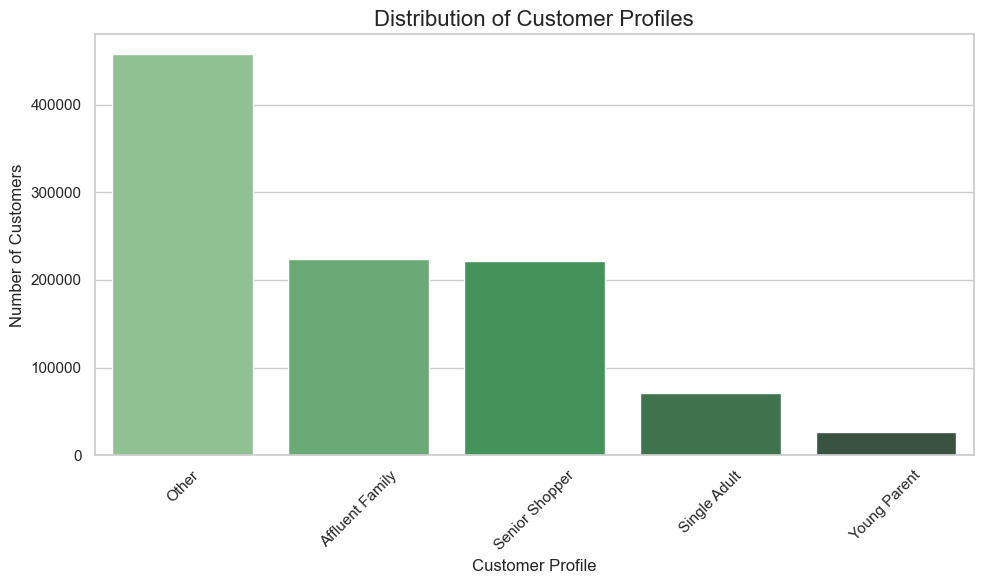

In [81]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=profile_counts.index, y=profile_counts.values, palette="Greens_d")

# Add labels and title
plt.title('Distribution of Customer Profiles', fontsize=16)
plt.xlabel('Customer Profile', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
bar.figure.savefig(r'C:\Users\sojan\Documents\Instacast_Basket_Analysis\04. Analysis\03. Visualizations\bar_chart_custo.jpg')

### Directions 7

In [92]:
# Assuming 'price' exists and we calculate total expenditure for each order
df['total_spent'] = df['prices'] * df['order_number']

In [94]:
# Grouping by customer profile and aggregating max_order and total_spent
profile_aggregates = df.groupby('customer_profile').agg({
    'max_order': ['max', 'mean', 'min'],
     'total_spent': ['max', 'mean', 'min']
})

# Flattening the MultiIndex columns for easier readability
profile_aggregates.columns = ['_'.join(col).strip() for col in profile_aggregates.columns.values]

# Reset index to make customer_profile a column
profile_aggregates = profile_aggregates.reset_index()

# Display the aggregated data
print(profile_aggregates)

  customer_profile  max_order_max  max_order_mean  max_order_min  \
0  Affluent Family             99       30.877966              1   
1            Other             99       30.858831              1   
2   Senior Shopper             99       30.312433              1   
3     Single Adult             99       30.927145              1   
4     Young Parent             99       32.711975              1   

   total_spent_max  total_spent_mean  total_spent_min  
0           2138.4        130.335177              1.0  
1           2052.0        132.095376              1.0  
2           2008.8        127.147515              1.0  
3           1960.0        130.596145              1.0  
4           1273.0         90.565007              1.6  


### Directions 8

In [32]:
df[['customer_profile','department_id','product_name','Region','max_order','spending_flag_x']]

,customer_profile,department_id,product_name,Region,max_order,spending_flag_x
0,Affluent Family,7,Soda,Midwest,8,Low spender
1,Affluent Family,7,Soda,Midwest,8,Low spender
2,Affluent Family,7,Soda,Midwest,8,Low spender
3,Other,7,Soda,West,5,Low spender
4,Other,7,Soda,West,5,Low spender
...,...,...,...,...,...,...
999995,Affluent Family,17,Sweeper Open Window Fresh Scent Wet Mopping Cl...,West,3,High spender
999996,Senior Shopper,16,Honey Vanilla Greek Yogurt,Midwest,8,Low spender
999997,Senior Shopper,19,White Cheddar Popcorn,Midwest,8,Low spender
999998,Senior Shopper,19,White Cheddar Popcorn,Midwest,8,Low spender


##### The very common statement is that every region in the USA has no same behavior customers. According to the above table, there are different customers like Affluent Family, Senior Shopper, and other segmentation of customers. Based on regions like the Midwest, Northwest, South, and West, different regions have different choices. The choice of customers is different in different regions like Midwest customers of Affluent Fimaly and others who spend less, they like to spend on soda. Whereas Senior Shoppers of the Midwest, like to spend more on honey vanilla Greek yogurt and white cheddar popcorn. Only high spender Affluent Family spend their money on sweepers with open window fresh scents which is a luxurious product and their order quantity is only 3. The relation between region and departments, their order quantity of products are all most same other than order quantity for soda.

### Directions 9

C:\Users\sojan\AppData\Local\Temp\ipykernel_17804\2003943604.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\sojan\AppData\Local\Temp\ipykernel_17804\2003943604.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


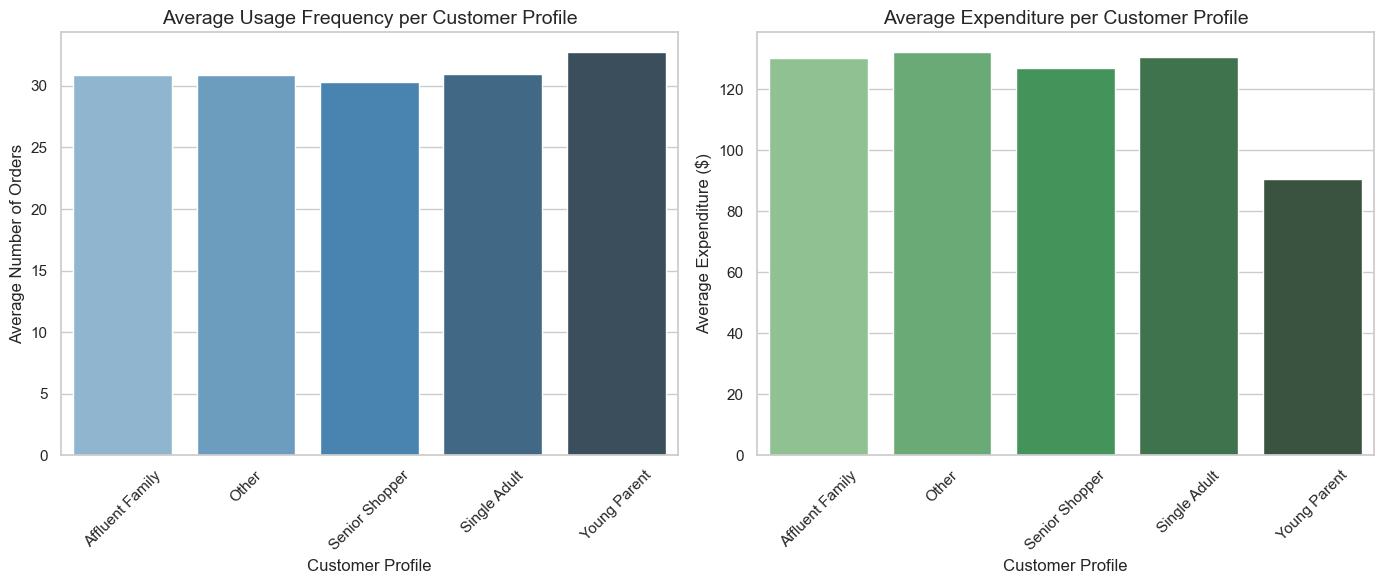

<Figure size 640x480 with 0 Axes>

In [104]:
# Set the visual style
sns.set(style="whitegrid")

# Define the size of the plots
plt.figure(figsize=(14, 6))

# ----------------------------
# Subplot 1: Mean Usage Frequency
# ----------------------------
plt.subplot(1, 2, 1)
sns.barplot(
    x='customer_profile',
    y='max_order_mean',
    data=profile_aggregates,
    palette='Blues_d'
)
plt.title('Average Usage Frequency per Customer Profile', fontsize=14)
plt.xlabel('Customer Profile', fontsize=12)
plt.ylabel('Average Number of Orders', fontsize=12)
plt.xticks(rotation=45)

# ----------------------------
# Subplot 2: Mean Expenditure
# ----------------------------
plt.subplot(1, 2, 2)
sns.barplot(
    x='customer_profile',
    y='total_spent_mean',
    data=profile_aggregates,
    palette='Greens_d'
)
plt.title('Average Expenditure per Customer Profile', fontsize=14)
plt.xlabel('Customer Profile', fontsize=12)
plt.ylabel('Average Expenditure ($)', fontsize=12)
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.figure(r'C:\Users\sojan\Documents\Instacast_Basket_Analysis\04. Analysis\03. Visualizations\mean_usage_expenditure.png')

# Show the plot
plt.show()

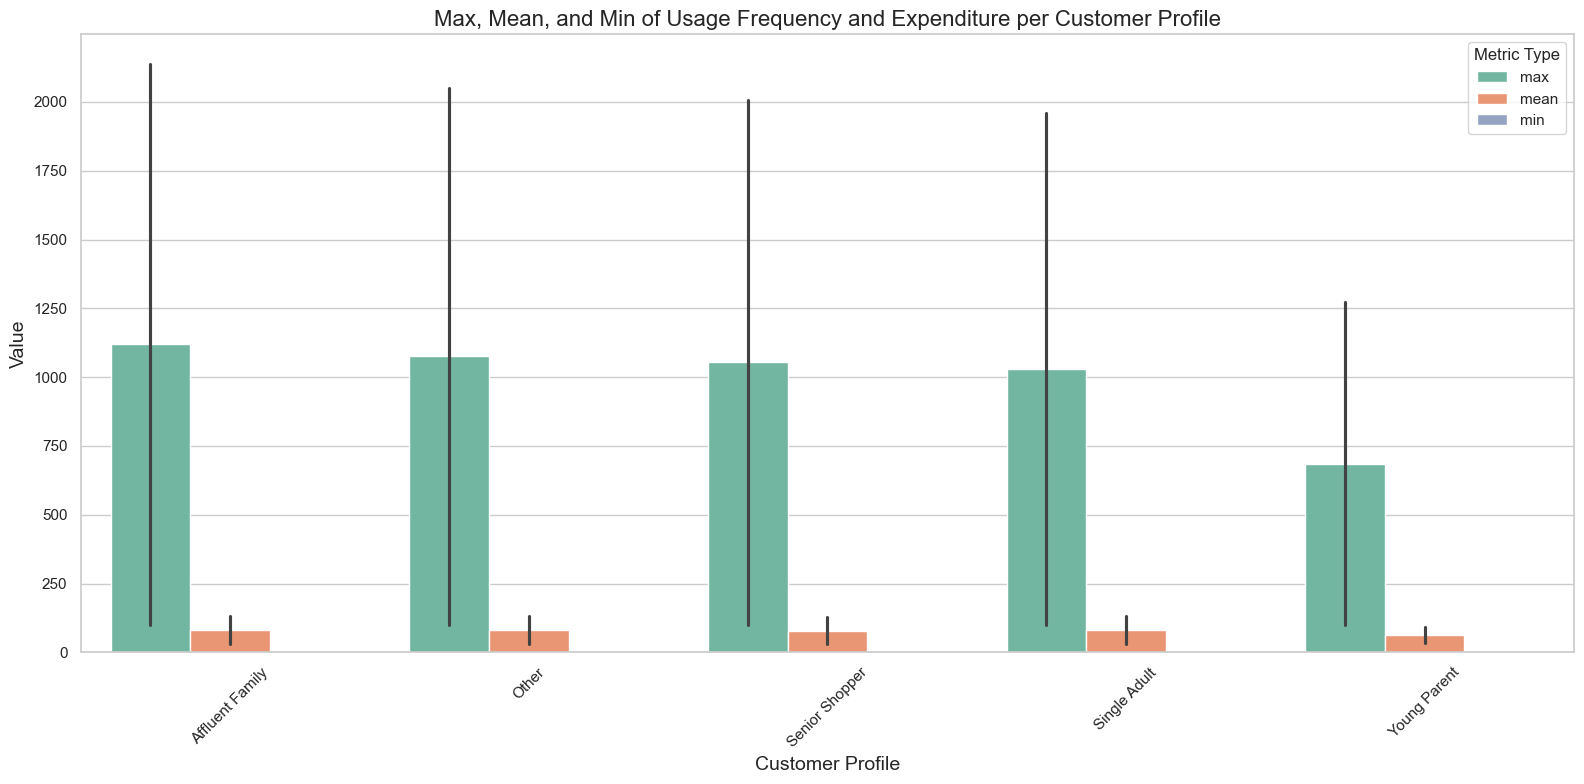

<Figure size 640x480 with 0 Axes>

In [108]:
# Melt the aggregated DataFrame for easier plotting
aggregated_melted = profile_aggregates.melt(
    id_vars='customer_profile',
    value_vars=['max_order_max', 'max_order_mean', 'max_order_min',
                'total_spent_max', 'total_spent_mean', 'total_spent_min'],
    var_name='Metric',
    value_name='Value'
)

# Create separate columns for Measurement and Type
aggregated_melted['Measurement'] = aggregated_melted['Metric'].apply(lambda x: 'Usage Frequency' if 'max_order' in x else 'Expenditure')
aggregated_melted['Type'] = aggregated_melted['Metric'].apply(lambda x: x.split('_')[-1])

# Set the size of the plot
plt.figure(figsize=(16, 8))

# Create a grouped barplot
sns.barplot(
    x='customer_profile',
    y='Value',
    hue='Type',
    data=aggregated_melted,
    palette='Set2'
)

plt.title('Max, Mean, and Min of Usage Frequency and Expenditure per Customer Profile', fontsize=16)
plt.xlabel('Customer Profile', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metric Type')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.figure(r'C:\Users\sojan\Documents\Instacast_Basket_Analysis\04. Analysis\03. Visualizations\mean_usage_expenditure.png')

# Show the plot
plt.show()